Ким Р.И. ИУ5-б2Б

ЛР №3. Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os
import zipfile

DATA_PATH = os.path.join('datasets')

def fetch_data(data_path=DATA_PATH):
    os.makedirs(data_path, exist_ok=True)
    zip_path = os.path.join(data_path, 'restaurant-scores-lives-standard.csv.zip')
    data_zip = zipfile.ZipFile(zip_path)
    data_zip.extractall(path=data_path)
    data_zip.close()

In [3]:
fetch_data()

In [4]:
def load_data(data_path=DATA_PATH):
    csv_path = os.path.join(data_path, 'restaurant-scores-lives-standard.csv')
    return pd.read_csv(csv_path)

In [5]:
data = load_data()
data

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_description,risk_category
0,69618,Fancy Wheatfield Bakery,1362 Stockton St,San Francisco,CA,94133,NaN,NaN,NaN,NaN,69618_20190304,2019-03-04T00:00:00.000,NaN,Complaint,69618_20190304_103130,Inadequate sewage or wastewater disposal,Moderate Risk
1,97975,BREADBELLY,1408 Clement St,San Francisco,CA,94118,NaN,NaN,NaN,1.415724e+10,97975_20190725,2019-07-25T00:00:00.000,96.0,Routine - Unscheduled,97975_20190725_103124,Inadequately cleaned or sanitized food contact...,Moderate Risk
2,69487,Hakkasan San Francisco,1 Kearny St,San Francisco,CA,94108,NaN,NaN,NaN,NaN,69487_20180418,2018-04-18T00:00:00.000,88.0,Routine - Unscheduled,69487_20180418_103119,Inadequate and inaccessible handwashing facili...,Moderate Risk
3,91044,Chopsticks Restaurant,4615 Mission St,San Francisco,CA,94112,NaN,NaN,NaN,NaN,91044_20170818,2017-08-18T00:00:00.000,NaN,Non-inspection site visit,NaN,NaN,NaN
4,85987,Tselogs,552 Jones St,San Francisco,CA,94102,NaN,NaN,NaN,NaN,85987_20180412,2018-04-12T00:00:00.000,94.0,Routine - Unscheduled,85987_20180412_103132,Improper thawing methods,Moderate Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53968,80305,Snowbird Coffee,1352 A 9th Ave,San Francisco,CA,94110,NaN,NaN,NaN,1.415596e+10,80305_20190411,2019-04-11T00:00:00.000,94.0,Routine - Unscheduled,80305_20190411_103149,Wiping cloths not clean or properly stored or ...,Low Risk
53969,80233,Buffalo Kitchen,107 Leland Ave,San Francisco,CA,94134,NaN,NaN,NaN,NaN,80233_20190417,2019-04-17T00:00:00.000,75.0,Routine - Unscheduled,80233_20190417_103133,Foods not protected from contamination,Moderate Risk
53970,100216,BUNN MIKE,300 DE HARO ST,San Francisco,CA,94103,NaN,NaN,NaN,1.415530e+10,100216_20190321,2019-03-21T00:00:00.000,84.0,Routine - Unscheduled,100216_20190321_103119,Inadequate and inaccessible handwashing facili...,Moderate Risk
53971,79430,City Discount Meat & Grocery Market,2298 Mission St,San Francisco,CA,94110,NaN,NaN,NaN,1.415544e+10,79430_20190418,2019-04-18T00:00:00.000,83.0,Routine - Unscheduled,79430_20190418_103109,Unclean or unsanitary food contact surfaces,High Risk


Обработка пропусков в данных

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53973 entries, 0 to 53972
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   business_id            53973 non-null  int64  
 1   business_name          53973 non-null  object 
 2   business_address       53973 non-null  object 
 3   business_city          53973 non-null  object 
 4   business_state         53973 non-null  object 
 5   business_postal_code   52890 non-null  object 
 6   business_latitude      29878 non-null  float64
 7   business_longitude     29878 non-null  float64
 8   business_location      29878 non-null  object 
 9   business_phone_number  17434 non-null  float64
 10  inspection_id          53973 non-null  object 
 11  inspection_date        53973 non-null  object 
 12  inspection_score       39859 non-null  float64
 13  inspection_type        53973 non-null  object 
 14  violation_id           40511 non-null  object 
 15  vi

In [7]:
data.isnull().sum()

business_id                  0
business_name                0
business_address             0
business_city                0
business_state               0
business_postal_code      1083
business_latitude        24095
business_longitude       24095
business_location        24095
business_phone_number    36539
inspection_id                0
inspection_date              0
inspection_score         14114
inspection_type              0
violation_id             13462
violation_description    13462
risk_category            13462
dtype: int64

In [8]:
sample_incomplete_rows = data[data.isnull().any(axis=1)].head()
sample_incomplete_rows

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_description,risk_category
0,69618,Fancy Wheatfield Bakery,1362 Stockton St,San Francisco,CA,94133,NaN,NaN,NaN,NaN,69618_20190304,2019-03-04T00:00:00.000,NaN,Complaint,69618_20190304_103130,Inadequate sewage or wastewater disposal,Moderate Risk
1,97975,BREADBELLY,1408 Clement St,San Francisco,CA,94118,NaN,NaN,NaN,1.415724e+10,97975_20190725,2019-07-25T00:00:00.000,96.0,Routine - Unscheduled,97975_20190725_103124,Inadequately cleaned or sanitized food contact...,Moderate Risk
2,69487,Hakkasan San Francisco,1 Kearny St,San Francisco,CA,94108,NaN,NaN,NaN,NaN,69487_20180418,2018-04-18T00:00:00.000,88.0,Routine - Unscheduled,69487_20180418_103119,Inadequate and inaccessible handwashing facili...,Moderate Risk
3,91044,Chopsticks Restaurant,4615 Mission St,San Francisco,CA,94112,NaN,NaN,NaN,NaN,91044_20170818,2017-08-18T00:00:00.000,NaN,Non-inspection site visit,NaN,NaN,NaN
4,85987,Tselogs,552 Jones St,San Francisco,CA,94102,NaN,NaN,NaN,NaN,85987_20180412,2018-04-12T00:00:00.000,94.0,Routine - Unscheduled,85987_20180412_103132,Improper thawing methods,Moderate Risk


Удалить строки с пропусками в business_latitude

In [9]:
sample_incomplete_rows.dropna(subset=['business_latitude'])

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_description,risk_category


Удалить столбцы, у которых есть пропуски

In [10]:
sample_incomplete_rows.drop("business_latitude", axis=1)

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_longitude,business_location,business_phone_number,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_description,risk_category
0,69618,Fancy Wheatfield Bakery,1362 Stockton St,San Francisco,CA,94133,NaN,NaN,NaN,69618_20190304,2019-03-04T00:00:00.000,NaN,Complaint,69618_20190304_103130,Inadequate sewage or wastewater disposal,Moderate Risk
1,97975,BREADBELLY,1408 Clement St,San Francisco,CA,94118,NaN,NaN,1.415724e+10,97975_20190725,2019-07-25T00:00:00.000,96.0,Routine - Unscheduled,97975_20190725_103124,Inadequately cleaned or sanitized food contact...,Moderate Risk
2,69487,Hakkasan San Francisco,1 Kearny St,San Francisco,CA,94108,NaN,NaN,NaN,69487_20180418,2018-04-18T00:00:00.000,88.0,Routine - Unscheduled,69487_20180418_103119,Inadequate and inaccessible handwashing facili...,Moderate Risk
3,91044,Chopsticks Restaurant,4615 Mission St,San Francisco,CA,94112,NaN,NaN,NaN,91044_20170818,2017-08-18T00:00:00.000,NaN,Non-inspection site visit,NaN,NaN,NaN
4,85987,Tselogs,552 Jones St,San Francisco,CA,94102,NaN,NaN,NaN,85987_20180412,2018-04-12T00:00:00.000,94.0,Routine - Unscheduled,85987_20180412_103132,Improper thawing methods,Moderate Risk


Заменить пропуски средним / медианой / самым частым значением

In [11]:
mean_ = data['inspection_score'].mean()
sample_incomplete_rows['inspection_score'].fillna(mean_, inplace=True)
sample_incomplete_rows

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_description,risk_category
0,69618,Fancy Wheatfield Bakery,1362 Stockton St,San Francisco,CA,94133,NaN,NaN,NaN,NaN,69618_20190304,2019-03-04T00:00:00.000,86.235254,Complaint,69618_20190304_103130,Inadequate sewage or wastewater disposal,Moderate Risk
1,97975,BREADBELLY,1408 Clement St,San Francisco,CA,94118,NaN,NaN,NaN,1.415724e+10,97975_20190725,2019-07-25T00:00:00.000,96.000000,Routine - Unscheduled,97975_20190725_103124,Inadequately cleaned or sanitized food contact...,Moderate Risk
2,69487,Hakkasan San Francisco,1 Kearny St,San Francisco,CA,94108,NaN,NaN,NaN,NaN,69487_20180418,2018-04-18T00:00:00.000,88.000000,Routine - Unscheduled,69487_20180418_103119,Inadequate and inaccessible handwashing facili...,Moderate Risk
3,91044,Chopsticks Restaurant,4615 Mission St,San Francisco,CA,94112,NaN,NaN,NaN,NaN,91044_20170818,2017-08-18T00:00:00.000,86.235254,Non-inspection site visit,NaN,NaN,NaN
4,85987,Tselogs,552 Jones St,San Francisco,CA,94102,NaN,NaN,NaN,NaN,85987_20180412,2018-04-12T00:00:00.000,94.000000,Routine - Unscheduled,85987_20180412_103132,Improper thawing methods,Moderate Risk


In [12]:
median = data['inspection_score'].median()
sample_incomplete_rows['inspection_score'].fillna(median, inplace=True)
sample_incomplete_rows

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_description,risk_category
0,69618,Fancy Wheatfield Bakery,1362 Stockton St,San Francisco,CA,94133,NaN,NaN,NaN,NaN,69618_20190304,2019-03-04T00:00:00.000,86.235254,Complaint,69618_20190304_103130,Inadequate sewage or wastewater disposal,Moderate Risk
1,97975,BREADBELLY,1408 Clement St,San Francisco,CA,94118,NaN,NaN,NaN,1.415724e+10,97975_20190725,2019-07-25T00:00:00.000,96.000000,Routine - Unscheduled,97975_20190725_103124,Inadequately cleaned or sanitized food contact...,Moderate Risk
2,69487,Hakkasan San Francisco,1 Kearny St,San Francisco,CA,94108,NaN,NaN,NaN,NaN,69487_20180418,2018-04-18T00:00:00.000,88.000000,Routine - Unscheduled,69487_20180418_103119,Inadequate and inaccessible handwashing facili...,Moderate Risk
3,91044,Chopsticks Restaurant,4615 Mission St,San Francisco,CA,94112,NaN,NaN,NaN,NaN,91044_20170818,2017-08-18T00:00:00.000,86.235254,Non-inspection site visit,NaN,NaN,NaN
4,85987,Tselogs,552 Jones St,San Francisco,CA,94102,NaN,NaN,NaN,NaN,85987_20180412,2018-04-12T00:00:00.000,94.000000,Routine - Unscheduled,85987_20180412_103132,Improper thawing methods,Moderate Risk


In [13]:
data['inspection_type'].value_counts()

Routine - Unscheduled                39956
Reinspection/Followup                 6695
Complaint                             2379
New Ownership                         1787
New Construction                       905
Non-inspection site visit              843
New Ownership - Followup               512
Structural Inspection                  360
Complaint Reinspection/Followup        232
Foodborne Illness Investigation        217
Routine - Scheduled                     76
Special Event                            6
Multi-agency Investigation               3
Administrative or Document Review        2
Name: inspection_type, dtype: int64

In [14]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

Кодирование категорий целочисленными значениями - label encoding

In [15]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(data['inspection_type'])
cat_enc_le

array([ 1, 11, 11, ..., 11, 11,  9])

In [16]:
np.unique(cat_enc_le)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [17]:
le.inverse_transform([0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

array(['Administrative or Document Review', 'Complaint',
       'Complaint Reinspection/Followup',
       'Foodborne Illness Investigation', 'Multi-agency Investigation',
       'New Construction', 'New Ownership', 'New Ownership - Followup',
       'Non-inspection site visit', 'Reinspection/Followup',
       'Routine - Scheduled', 'Routine - Unscheduled', 'Special Event',
       'Structural Inspection'], dtype=object)

In [18]:
data['inspection_type_le'] = cat_enc_le
data

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_description,risk_category,inspection_type_le
0,69618,Fancy Wheatfield Bakery,1362 Stockton St,San Francisco,CA,94133,NaN,NaN,NaN,NaN,69618_20190304,2019-03-04T00:00:00.000,NaN,Complaint,69618_20190304_103130,Inadequate sewage or wastewater disposal,Moderate Risk,1
1,97975,BREADBELLY,1408 Clement St,San Francisco,CA,94118,NaN,NaN,NaN,1.415724e+10,97975_20190725,2019-07-25T00:00:00.000,96.0,Routine - Unscheduled,97975_20190725_103124,Inadequately cleaned or sanitized food contact...,Moderate Risk,11
2,69487,Hakkasan San Francisco,1 Kearny St,San Francisco,CA,94108,NaN,NaN,NaN,NaN,69487_20180418,2018-04-18T00:00:00.000,88.0,Routine - Unscheduled,69487_20180418_103119,Inadequate and inaccessible handwashing facili...,Moderate Risk,11
3,91044,Chopsticks Restaurant,4615 Mission St,San Francisco,CA,94112,NaN,NaN,NaN,NaN,91044_20170818,2017-08-18T00:00:00.000,NaN,Non-inspection site visit,NaN,NaN,NaN,8
4,85987,Tselogs,552 Jones St,San Francisco,CA,94102,NaN,NaN,NaN,NaN,85987_20180412,2018-04-12T00:00:00.000,94.0,Routine - Unscheduled,85987_20180412_103132,Improper thawing methods,Moderate Risk,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53968,80305,Snowbird Coffee,1352 A 9th Ave,San Francisco,CA,94110,NaN,NaN,NaN,1.415596e+10,80305_20190411,2019-04-11T00:00:00.000,94.0,Routine - Unscheduled,80305_20190411_103149,Wiping cloths not clean or properly stored or ...,Low Risk,11
53969,80233,Buffalo Kitchen,107 Leland Ave,San Francisco,CA,94134,NaN,NaN,NaN,NaN,80233_20190417,2019-04-17T00:00:00.000,75.0,Routine - Unscheduled,80233_20190417_103133,Foods not protected from contamination,Moderate Risk,11
53970,100216,BUNN MIKE,300 DE HARO ST,San Francisco,CA,94103,NaN,NaN,NaN,1.415530e+10,100216_20190321,2019-03-21T00:00:00.000,84.0,Routine - Unscheduled,100216_20190321_103119,Inadequate and inaccessible handwashing facili...,Moderate Risk,11
53971,79430,City Discount Meat & Grocery Market,2298 Mission St,San Francisco,CA,94110,NaN,NaN,NaN,1.415544e+10,79430_20190418,2019-04-18T00:00:00.000,83.0,Routine - Unscheduled,79430_20190418_103109,Unclean or unsanitary food contact surfaces,High Risk,11


Кодирование категорий наборами бинарных значений - one-hot encoding

In [19]:
ohe = OneHotEncoder()
cat_ohe = ohe.fit_transform(data[['inspection_type']])

In [20]:
ohe.categories_

[array(['Administrative or Document Review', 'Complaint',
        'Complaint Reinspection/Followup',
        'Foodborne Illness Investigation', 'Multi-agency Investigation',
        'New Construction', 'New Ownership', 'New Ownership - Followup',
        'Non-inspection site visit', 'Reinspection/Followup',
        'Routine - Scheduled', 'Routine - Unscheduled', 'Special Event',
        'Structural Inspection'], dtype=object)]

In [21]:
cat_ohe.toarray()

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Pandas get_dummies - быстрый вариант one-hot кодирования

In [22]:
pd.get_dummies(data['inspection_type'])

,Administrative or Document Review,Complaint,Complaint Reinspection/Followup,Foodborne Illness Investigation,Multi-agency Investigation,New Construction,New Ownership,New Ownership - Followup,Non-inspection site visit,Reinspection/Followup,Routine - Scheduled,Routine - Unscheduled,Special Event,Structural Inspection
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53968,0,0,0,0,0,0,0,0,0,0,0,1,0,0
53969,0,0,0,0,0,0,0,0,0,0,0,1,0,0
53970,0,0,0,0,0,0,0,0,0,0,0,1,0,0
53971,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [23]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

MinMax масштабирование

In [24]:
d_1 = data.dropna(subset=['inspection_score'])

In [25]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['inspection_score']])

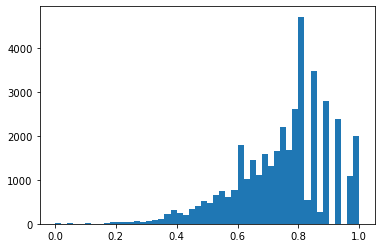

In [30]:
plt.hist(sc1_data, 50)
plt.show()

Масштабирование данных на основе Z-оценки - StandardScaler

In [31]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['inspection_score']])

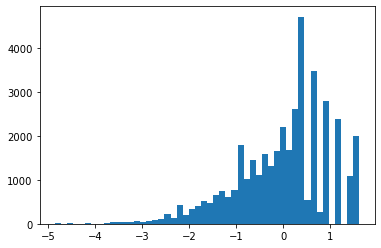

In [33]:
plt.hist(sc2_data, 50)
plt.show()

Нормализация данных

In [34]:
sc3 = Normalizer()
sc3_data = sc3.fit_transform(d_1[['inspection_score']])

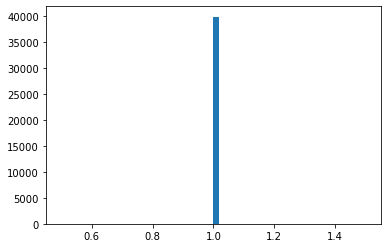

In [35]:
plt.hist(sc3_data, 60)
plt.show()